# Entropie a kódování

In [1]:
from collections import Counter
import math

from IPython.display import Image
import numpy as np
from numpy.linalg import inv
import scipy.linalg as la
import scipy.stats as st

In [3]:
from fractions import Fraction
# pozor může být nepřesné
def vystup_zlomky(matrix):
    for i in range(matrix.shape[0]):
        row = ""
        for j in range(matrix.shape[1]):
            row += str(Fraction(matrix[i, j]).limit_denominator())
            row += "\t"
        print(row)

# Entropie

Pokud dáváte matici, musí být prvky $p(x,y)$, ne $p(x|y)$.

## Entropie

https://marast.fit.cvut.cz/cs/problems/10194

$$H(X)=-\sum_{x \in \mathcal{X}} p(x) \log p(x)$$

In [4]:
# DATA

# TODO: NASTAVIT
# SLOUPCE: X, ŘÁDKY: Y
matice = np.matrix([
    [1/4, 1/8, 1/2, 1/8]
])
# x\y
matice = np.matrix([
    [1/8, 1/16, 1/32, 1/32],
    [1/16, 1/8, 1/32, 1/32],
    [1/16, 1/16, 1/16, 1/16],
    [1/4, 0, 0, 0],
])
matice = np.matrix([
    [1/16, 1/16, 1/8],
    [1/8, 1/16, 1/16],
    [1/8, 1/4, 1/8],
])
osa = 1 # 0 = H(X) ... sečíst sloupce, 1 = H(Y) ... sečíst řádky

# PROGRAM
def entropie(matrix, axis):
    p = np.squeeze(np.asarray(np.sum(matrix, axis = axis)))
    result = 0
    for i in range(p.size):
        if p[i] == 0:
            continue
        result += p[i] * math.log(p[i], 2)
    return -result

_res = entropie(matice, osa)
print("H(X) =", Fraction(_res).limit_denominator(), "=", _res)

H(X) = 3/2 = 1.5


## Sdružená entropie

https://marast.fit.cvut.cz/cs/problems/10194

Sdružená entropie $H(X, Y)$ diskrétních náhodných veličin $X, Y$ se sdruženým
rozdělením $p(x, y)$ je definována jako

$$H(Y, X) = - \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(x, y) \log p(y, x)$$

In [4]:
# DATA

# TODO: NASTAVIT
# x\y
matice = np.matrix([
    [1/8, 1/16, 1/32, 1/32],
    [1/16, 1/8, 1/32, 1/32],
    [1/16, 1/16, 1/16, 1/16],
    [1/4, 0, 0, 0],
])

# PROGRAM
def sdruzena_entropie(matrix):
    result = 0
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix[i, j] == 0:
                continue
            result += matrix[i, j] * np.log2(matrix[i, j])
    
    return -result

_res = sdruzena_entropie(matice)
print("H(X, Y) =", Fraction(_res).limit_denominator(), "=", _res)

H(X, Y) = 27/8 = 3.375


## Podmíněná entropie

https://marast.fit.cvut.cz/cs/problems/10195

Podmíněná entropie $H(Y|X)$ diskrétních náhodných veličin $X, Y$ se sdruženým
rozdělením $p(x, y)$ je definována jako

$$H(Y | X) = - \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(x, y) \log p(y | x)$$

kde $p(y|x) = \frac{p(x, y)}{p(X)}$.

Platí $$H(X|Y) = \sum_{y\in \mathcal{Y}}p(y)H(X|Y = y)$$

In [5]:
# DATA

# TODO: NASTAVIT
# H(Y|X) ... sloupce x, řádky y
# x\y
matice = np.matrix([
    [1/8, 1/16, 1/32, 1/32],
    [1/16, 1/8, 1/32, 1/32],
    [1/16, 1/16, 1/16, 1/16],
    [1/4, 0, 0, 0],
])
#matice = np.transpose(matice) # TODO: pokud chceš H(X|Y)

# PROGRAM
def podminena_entropie(matrix, axis):
    p_x = np.squeeze(np.asarray(np.sum(matrix, axis = 0)))

    result = 0
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix[i, j] == 0:
                continue
            p_xy = matrix[i, j]
            p_y_con_x = p_xy / p_x[j]
            result += p_xy * np.log2(p_y_con_x)
    
    return -result

_res = podminena_entropie(matice, 0)
print("H(X|Y) =", Fraction(_res).limit_denominator(), "=", _res)

H(X|Y) = 13/8 = 1.625


## Relativní entropie

https://marast.fit.cvut.cz/cs/problems/10196

Relativní entropie nebo Kullback-Leiblerova vzdálenost $D(p||q)$ mezi diskrétním
rozdělením $p$ a diskrétním rozdělením $q$ na množině $X$ je definována vztahem

$$D(p \| q)=\sum_{x \in \mathcal{X}} p(x) \log \frac{p(x)}{q(x)}$$

- Klademe $0 \log{\frac{0}{0}} = 0, 0 \log{\frac{0}{q}} = 0$ a $p \log{\frac{p}{0}} = + \infty$.
- Pokud tedy existuje $x$ tak, že $p(x) > 0$ a $q(x) = 0$, platí $D(p||q) = + \infty$.
- $D(p||q)$ lze chápat jako vzdálenost, protože jak uvidíme později, je vždy nezáporná a
rovna 0 pouze, pokud jsou $p$ a $q$ stejné.
- Na rozdíl od opravdové vzdálenosti ale $D(p||q)$ obecně **není** rovno $D(q||p)$ a ani trojúhelníková nerovnost neplatí.

In [6]:
# DATA

# TODO: NASTAVIT
p = np.array([1/4, 1/4, 1/4, 1/4])
q = np.array([5/8, 1/4, 1/16, 1/16])

# PROGRAM
def relativni_entropie(p, q):
    result = 0
    for i in range(p.size):
        result += p[i] * math.log2(p[i] / q[i])
    return result

_res = relativni_entropie(p, q)
print("D(p||q) =", Fraction(_res).limit_denominator(), "=", _res)

D(p||q) = 262127/391516 = 0.6695179762781595


## Vzájemná informace

https://marast.fit.cvut.cz/cs/problems/10197

Vzájemná informace $I(X; Y )$ diskrétních náhodných veličin $X$ a $Y$ je definována vztahem

$$I(X;Y)=\sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}} p(x, y) \log \frac{p(x,y)}{p(x) p(y)}$$

- Jedná se tedy o relativní entropii skutečného sdruženého rozdělení a rozdělení nezávislých veličin se stejnými marginálami,

$$I(X;Y)=D(p(x,y) || p(x)p(y))$$

- Ze symetrie definičního vztahu plyne $I(X;Y) = I(Y;X)$
- Jak uvidíme za chvíli, z nezápornosti relativní entropie plyne $I(X;Y) \ge 0$.
- Vzájemná informace $I(X;X)=H(X)$
- $I(X;Y) = -H(X,Y)+H(X)+H(Y)$
- $I(X;Y) = H(X)-H(X|Y)$
- $I(X;Y) = H(Y)-H(Y|X)$

In [7]:
# DATA

# TODO: NASTAVIT
# x\y
# SLOUPCE: X, ŘÁDKY: Y

matice = np.matrix([
    [1/8, 1/16, 1/32, 1/32],
    [1/16, 1/8, 1/32, 1/32],
    [1/16, 1/16, 1/16, 1/16],
    [1/4, 0, 0, 0],
])

# PROGRAM
def vzajemna_informace(matrix):
    p_x = np.squeeze(np.asarray(np.sum(matrix, axis = 0)))
    p_y = np.squeeze(np.asarray(np.sum(matrix, axis = 1)))

    result = 0
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix[i, j] == 0:
                continue
            p_xy = matrix[i, j]
            p_xy_x_y = p_xy / (p_x[j] * p_y[i])
            result += p_xy * np.log2(p_xy_x_y)
    
    return result

_res = vzajemna_informace(matice)
print("I(X;Y) =", Fraction(_res).limit_denominator(), "=", _res)

I(X;Y) = 3/8 = 0.375


# Kódování

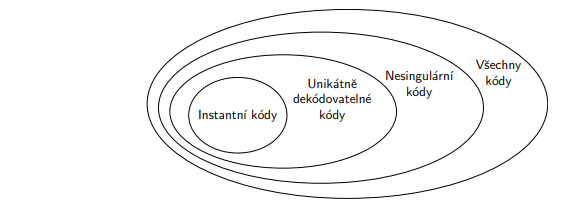

In [2]:
Image(filename='imgs/hierarchie_kodu.png')

**Nesingulární kod:** Každému znaku přiřadíme právě jedno odlišné kodove slovo.

**Unikátně dekodovatlne kody:** Při čtení zprávy zleva doprava jsme schopni jednoznačně určit o jaké kodové slovo se jedná.

**Instatní kody**: Kod nazýváme instantní pokud žádné kodove slovo není prefixem jiného slova.

## Optimální kod

![](https://firebasestorage.googleapis.com/v0/b/firescript-577a2.appspot.com/o/imgs%2Fapp%2Ftomas_graph%2FivJQqGKrlO.png?alt=media&token=856696fe-1919-46ee-9f09-40f71a639df8)

![](https://firebasestorage.googleapis.com/v0/b/firescript-577a2.appspot.com/o/imgs%2Fapp%2Ftomas_graph%2F3M0agpl7rA.png?alt=media&token=5d26b9bc-48c1-46b1-8b1e-de3997b49ce1)

**Stačí když se vejde do tohoto intervalu a pak je optimální (nemusí být rovnost entropii).**

## Střední délka kódu

Střední délku $L(C)$ kódu $C$ náhodné veličiny $X$ s rozdělením $p(x)$ definujeme jako

$$L(C) = \sum_{x \in \chi}{l(x)p(x)}$$

kde $l(x)$ je délka kódového slova příslušejícího prvku $x \in \chi$.

In [8]:
# DATA

# TODO: NASTAVIT
k = 2 # báze kódování
slova = np.array(["11110", "11111", "0", "10", "1110", "110"])
pst   = np.array([1/16, 1/16, 1/4, 1/4, 1/8, 1/4])

# PROGRAM
def stredni_delka_kodu(slova, pst, k):
    result = 0

    for i in range(slova.size):
        result += len(slova[i]) * pst[i]

    return result

_res = stredni_delka_kodu(slova, pst, k)
print("L(C) =", Fraction(_res).limit_denominator(), "=", _res)
_e = entropie(np.matrix([pst]), 0)
print("H(x) =", Fraction(_e).limit_denominator(), "=", _e)
print("Platí H(X) <= L(C) <= H(X) + 1" if _e <= _res <= _e + 1 else "Neplatí H(X) <= L(C) <= H(X) + 1")

L(C) = 21/8 = 2.625
H(x) = 19/8 = 2.375
platí H(X) <= L(C) <= H(X) + 1


# Dekódování zprávy

In [9]:
# DATA

# TODO: NASTAVIT
nahodna_velicina = np.array([1, 2, 3, 4])
slova = np.array(["0", "10", "110", "111"])
zprava = "0110111100110"

# PROGRAM
def dekodovat_zpravu(nahodna_velicina, slova, zprava):
    result = []
    tmp = ""

    for i in range(len(zprava)):
        tmp += zprava[i]
        itemindex = np.where(slova==tmp)
        if itemindex[0].size != 0:
            result.append(nahodna_velicina[itemindex[0][0]])
            tmp = ""

    return result

_res = dekodovat_zpravu(nahodna_velicina, slova, zprava)
print("původní zpráva =", _res)

původní zpráva = [1, 3, 4, 2, 1, 3]


## Huffmanovo kódování

https://marast.fit.cvut.cz/cs/problems/10190

- Optimální kód.

### Algoritmus:
1. Seřadit výsledky podle pravděpodobnosti
2. Dva nejměně pravděpodobné seskupit
3. Spočíst znova pravděpodobnost a znovu bod 1
4. Až se dostanu nakonec, tak přiřadím symboly

In [5]:
# DATA

# TODO: NASTAVIT
x_chars = "m" * 5 + "b" * 5 + "h" * 15 + "k" * 20 + "p" * 20 + "o" * 35 # string s počty znaků dle poměru pst

# PROGRAM
x_chars = Counter(x_chars)
# Recursively builds code from binary tree
def build_encoding_from_tree(tree, code = ''):
    # either tuple or string (tree list)
    if type(tree) == str:
        return {tree: code}

    # recursion
    left = build_encoding_from_tree(tree[0], code + '1')
    right = build_encoding_from_tree(tree[1], code + '0')

    # Unpact left and right dicts
    return {**left, **right}

# Parses char: count dictionary to binary tree
def parse_characters_to_tree(chars_counter):
    tree = chars_counter.most_common()[::-1]

    while len(tree) > 1:
        # sort
        tree.sort(key=lambda elem: elem[1])

        # get first and second worst (that is least common) chars
        first_worst = tree[0]
        second_worst = tree[1]
        rest = tree[2:]

        # concat first and second worst chars
        # [(char_1, char_2), value_1 + value_2] + rest of the list
        tree = [((first_worst[0], second_worst[0]), first_worst[1] + second_worst[1])] + rest

    # root of parsed tree
    return tree[0][0]

# Get encoding map
def get_encoding(chars_counter):
    return build_encoding_from_tree(parse_characters_to_tree(chars_counter))

_res = get_encoding(x_chars)
print("huffmanovo kódování =", _res)

huffmanovo kódování = {'p': '11', 'k': '10', 'b': '0111', 'm': '0110', 'h': '010', 'o': '00'}
